<div class="alert alert-block alert-info">
    <h1><center> Lending Club Case Study</center></h2>

<b>Team : Raina Sharma & Rahul Madan</b> <br>
Date : 10th November 2021

### Business Objective :
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.core.display import HTML

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#read the dataset and check the first five rows
pd.set_option("display.max_columns", 111)## For viewing the columns in this notebook.
loan_df=pd.read_csv("loan.csv", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Check the shape of the dataframe
loan_df.shape

(39717, 111)

<div class="alert alert-block alert-info">
    <h2>Data Handling and Cleaning</h2>

In [5]:
# Considering only those columns which have null values less than 40% in that particular column
loan_df = loan_df[loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.4]]
loan_df.shape

(39717, 54)

In [6]:
## Checking columns having unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [7]:
## Dropping the columns having just one unique value
loan_df = loan_df.loc[:,loan_df.nunique() != 1]
loan_df.shape

(39717, 45)

In [8]:
## Observing columns in the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
## Dropping unnecessary columns
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","desc","emp_title","title"]
loan_df.drop(columns=del_cols, inplace=True)
loan_df.shape

(39717, 28)

In [366]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [10]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2).sort_values(ascending=False)

emp_length              2.71
pub_rec_bankruptcies    1.75
revol_util              0.13
addr_state              0.00
total_pymnt_inv         0.00
total_pymnt             0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
inq_last_6mths          0.00
earliest_cr_line        0.00
delinq_2yrs             0.00
dti                     0.00
loan_amnt               0.00
funded_amnt             0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
term                    0.00
funded_amnt_inv         0.00
purpose                 0.00
dtype: float64

In [11]:
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [13]:
loan_df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
         ... 
47.36%      1
94.46%      1
17.71%      1
56.26%      1
0.75%       1
Name: revol_util, Length: 1089, dtype: int64

In [14]:
#replacing the missing values with mode value.
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True) ## Since most of the values are MzEzddNNNWrRokVav




<div class="alert alert-block alert-info">
<h2>Handling Data Types</h2>

In [15]:
# Analyze the data types of each column
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

Now we will analyze each column in the dataframe to get more clarity of the type of values it has. We will fix the data for the purpose of study and will create derived columns as required.

In [16]:
# term column
loan_df["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [17]:
# Changes in the term column. Replace " months" in the term
loan_df['term_months'] = loan_df['term'].str.rstrip('months')
del loan_df['term']

In [18]:
# int_rate column
loan_df["int_rate"].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.15%      1
16.71%      1
22.64%      1
18.72%      1
21.48%      1
Name: int_rate, Length: 371, dtype: int64

In [19]:
# Changes in the int_rate column. Replace "%" associated with the interest rate
loan_df['int_rate_percentage'] = loan_df['int_rate'].str.rstrip('%')
del loan_df['int_rate']

In [20]:
# emp_length column
loan_df["emp_length"].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [378]:
# Changes in emp_length column. Remove years associated with the value.
#loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip('years ')
#loan_df['emp_length_years'].replace({'10+': '10'}, inplace=True)
#loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'
#del loan_df['emp_length']

In [21]:
# home_ownership column
loan_df["home_ownership"].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [22]:
# Changes in home_ownership column. Replace None with Other
loan_df['home_ownership']=loan_df['home_ownership'].replace('NONE', 'OTHER')

In [23]:
# annual_inc column
loan_df["annual_inc"].value_counts()

60000.0     1505
50000.0     1057
40000.0      876
45000.0      830
30000.0      825
            ... 
112008.0       1
64704.0        1
61938.0        1
49668.0        1
140900.0       1
Name: annual_inc, Length: 5318, dtype: int64

In [24]:
# Creating derived metrics -- Loan to income ratio
loan_df['loan_income_ratio']= loan_df['loan_amnt']/loan_df['annual_inc']

In [25]:
# verification_status column
loan_df["verification_status"].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [26]:
# issue_d column
loan_df["issue_d"].value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [27]:
# create two new columns of month and year from issue date.
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df[
    'issue_d'].str.split('-').str

In [28]:
# convert issue_date_year to four digit year
loan_df['issue_d_year'] = '20' + loan_df['issue_d_year']
del loan_df['issue_d']

In [29]:
# loan_status column
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [30]:
# purpose column
loan_df["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [389]:
# addr_state column
loan_df["addr_state"].value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [31]:
## revol_util
loan_df["revol_util"].value_counts()

0%        1027
0.20%       63
63%         62
66.70%      58
40.70%      58
          ... 
47.36%       1
94.46%       1
17.71%       1
56.26%       1
0.75%        1
Name: revol_util, Length: 1089, dtype: int64

In [32]:
# Replace % in columns
loan_df['revol_util_percentage'] = loan_df['revol_util'].str.rstrip('%')
del loan_df['revol_util']

#### Changing Data types of the column

In [33]:
# Change datatype of these columns to float
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'total_pymnt', 'total_pymnt_inv',  'int_rate_percentage',
          'revol_util_percentage']
loan_df[columns] = loan_df[columns].astype(np.float)

In [34]:
# Change datatype of these columns to int
columns = ['total_acc', 'term_months', 'issue_d_year']
loan_df[columns] = loan_df[columns].astype(np.int)

In [35]:
# Change datatype of these columns to category
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies','emp_length']
loan_df[columns] = loan_df[columns].apply(lambda x: x.astype('category'))

In [36]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,term_months,int_rate_percentage,loan_income_ratio,issue_d_month,issue_d_year,revol_util_percentage
0,5000.0,5000.0,4975.0,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,9,5863.155187,5833.84,0.0,36,10.65,0.208333,Dec,2011,83.7
1,2500.0,2500.0,2500.0,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,4,1008.710000,1008.71,0.0,60,15.27,0.083333,Dec,2011,9.4
2,2400.0,2400.0,2400.0,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,10,3005.666844,3005.67,0.0,36,15.96,0.195886,Dec,2011,98.5
3,10000.0,10000.0,10000.0,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,37,12231.890000,12231.89,0.0,36,13.49,0.203252,Dec,2011,21.0
4,3000.0,3000.0,3000.0,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,Jan-96,0,15,0,27783.0,38,3513.330000,3513.33,0.0,60,12.69,0.037500,Dec,2011,53.9


<div class="alert alert-block alert-info">
<h2>Find outliers and remove them from data</h2>

In [37]:
loan_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,term_months,int_rate_percentage,loan_income_ratio,issue_d_year,revol_util_percentage
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,13382.528086,22.088828,12153.596544,11567.149118,42.418007,12.021177,0.187914,2010.328902,48.770677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,15885.016641,11.401709,9042.040766,8942.672613,10.622815,3.724825,0.116370,0.877514,28.367689
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,36.000000,5.420000,0.000789,2007.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,3703.000000,13.000000,5576.930000,5112.310000,36.000000,9.250000,0.100000,2010.000000,25.300000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,8850.000000,20.000000,9899.640319,9287.150000,36.000000,11.860000,0.166102,2011.000000,49.200000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,17058.000000,29.000000,16534.433040,15798.810000,60.000000,14.590000,0.251311,2011.000000,72.300000
90%,22000.000000,21000.000000,20000.000000,622.952000,1.160000e+05,22.330000,29144.400000,38.000000,24775.362578,24083.702000,60.000000,16.890000,0.350877,2011.000000,87.800000
95%,25000.000000,25000.000000,24736.572264,762.996000,1.420000e+05,23.840000,41656.400000,43.000000,30245.118530,29627.236000,60.000000,18.540000,0.416667,2011.000000,93.500000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,90.000000,58563.679930,58563.680000,60.000000,24.590000,0.830000,2011.000000,99.900000


##### Observation: The maximum value is almost 100 times more than the mean value for annual income

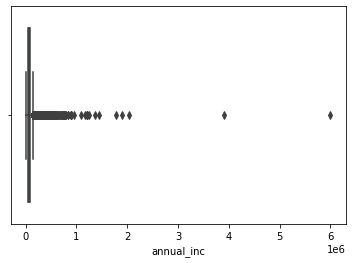

In [38]:
# Checking outliers in each column
sns.boxplot(loan_df['annual_inc'])
plt.show()

In [39]:
income = np.percentile(loan_df['annual_inc'], [5,95])

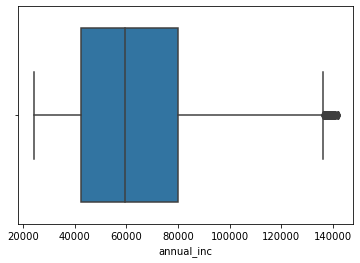

In [270]:
loan_df = loan_df[(loan_df.annual_inc > income[0]) & (loan_df.annual_inc < income[1])]

sns.boxplot(data=loan_df,x='annual_inc')
plt.show()

In [41]:
loan_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,term_months,int_rate_percentage,loan_income_ratio,issue_d_year,revol_util_percentage
count,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000,35523.000000
mean,11230.837063,10962.655885,10412.919370,324.434283,63658.278175,13.565830,12926.111111,22.276159,12139.423629,11555.387803,42.530530,11.989240,0.189314,2010.334994,49.033381
std,7168.464660,6908.563316,6859.813209,199.894175,26505.178050,6.635072,14027.410724,11.119164,8683.451753,8597.064928,10.681203,3.715804,0.115305,0.872987,28.172276
min,500.000000,500.000000,0.000000,16.080000,24044.000000,0.000000,0.000000,2.000000,0.000000,0.000000,36.000000,5.420000,0.007375,2007.000000,0.000000
25%,6000.000000,5800.000000,5000.000000,172.355000,42893.000000,8.520000,3964.500000,14.000000,5756.278976,5353.320000,36.000000,8.940000,0.100000,2010.000000,25.900000
50%,10000.000000,10000.000000,9074.323501,286.300000,59800.550000,13.720000,9114.000000,21.000000,10132.664860,9525.860000,36.000000,11.830000,0.166667,2011.000000,49.600000
75%,15000.000000,15000.000000,14325.000000,426.480000,80000.000000,18.800000,16941.000000,29.000000,16450.168815,15737.685000,60.000000,14.500000,0.254167,2011.000000,72.300000
90%,21000.000000,20000.000000,19975.000000,604.960000,102000.000000,22.430000,27842.800000,37.000000,24239.995834,23500.712000,60.000000,16.890000,0.350877,2011.000000,87.700000
95%,25000.000000,25000.000000,24225.000000,720.649000,120000.000000,23.880000,38189.600000,43.000000,29514.369509,28939.011000,60.000000,18.390000,0.414402,2011.000000,93.500000
max,35000.000000,35000.000000,35000.000000,1305.190000,141996.000000,29.990000,149000.000000,90.000000,58563.679930,58563.680000,60.000000,24.400000,0.819672,2011.000000,99.900000


Now after data cleanup, we will proceed with EDA

<div class="alert alert-block alert-info">
<h2> Exploratory Data Analysis (EDA)</h2>

In [43]:
## Drop rows with loan_status==current
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.loan_status = loan_df.loan_status.cat.remove_categories('Current') ## removing category

In [44]:
loan_df.reset_index(drop=True, inplace=True)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,term_months,int_rate_percentage,loan_income_ratio,issue_d_month,issue_d_year,revol_util_percentage
0,2500.0,2500.0,2500.0,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,4,1008.710000,1008.71,0.0,60,15.27,0.083333,Dec,2011,9.4
1,10000.0,10000.0,10000.0,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,37,12231.890000,12231.89,0.0,36,13.49,0.203252,Dec,2011,21.0
2,5000.0,5000.0,5000.0,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963.0,12,5632.210000,5632.21,0.0,36,7.90,0.138889,Dec,2011,28.3
3,7000.0,7000.0,7000.0,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726.0,11,10110.840000,10110.84,0.0,60,15.96,0.148923,Dec,2011,85.6
4,3000.0,3000.0,3000.0,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221.0,4,3939.135294,3939.14,0.0,36,18.64,0.062500,Dec,2011,87.5


#### Reusable functions

In [272]:
#Show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d):
    #plt.margins(0.1, 0.1)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()  
    counts = {}
    if type(d) is not float:
        for key, value in d.items():
            counts[str(key)] = value
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if type(d) is float:
            label = '{}'.format(str(round(y_value*100/d,2)) + "%")
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    return ax

In [273]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(10, 4))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 16))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return showLabels(ax,total)

def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().sort_values().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax,float(len(df)))
    plt.tight_layout()


def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 'Charged Off')].groupby([plotby]).loan_status.count()
    #print(charged_off)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = charged_off * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()
    
def plot_fully_paid(dataframe,plotby):
    fully_paid=dataframe.loc[(dataframe.loan_status== 'Fully Paid')].groupby([plotby]).loan_status.count()
    #print(fully_paid)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = fully_paid * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('fully_paid % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()

<div class="alert alert-block alert-info">
    <h2>Univariate Analysis</h2>

#### 1.  Loan_status

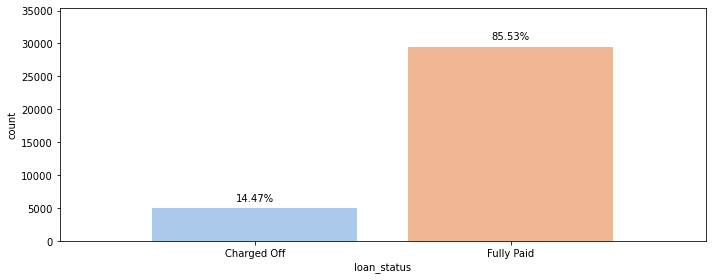

In [266]:
count_plot(loan_df,'loan_status')
plt.show()

##### Observation
    As we can see , 85% of the loans are successfully paid and only 15% of the loans are defaulted

#### 2. Loan, Funded, Committed amounts

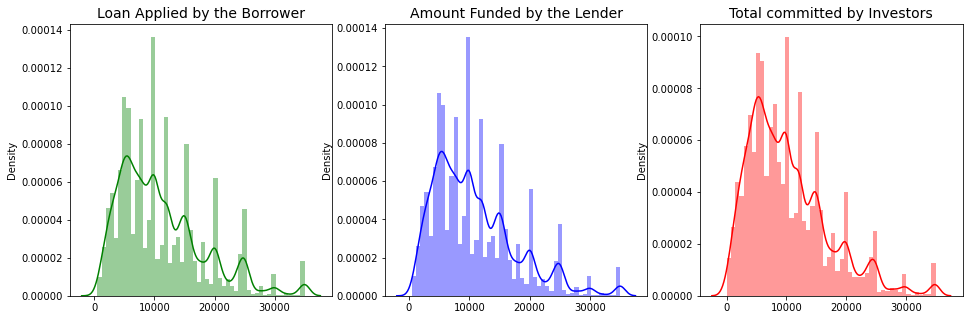

In [48]:

figure, axis = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loan_df["loan_amnt"].values, ax=axis[0], color="green")
axis[0].set_title("Loan Applied by the Borrower", fontsize=14)

sns.distplot(loan_df["funded_amnt"].values, ax=axis[1], color="blue")
axis[1].set_title("Amount Funded by the Lender", fontsize=14)

sns.distplot(loan_df["funded_amnt_inv"].values, ax=axis[2], color="red")
axis[2].set_title("Total committed by Investors", fontsize=14)


plt.show()

#### Observation
    - Loan\Funded\Committed amounts see a spike around each 5000 boundary.

#### 3. Funded_amnt

In [49]:
loan_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4991.0,12063.784813,7574.869495,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,29499.0,10594.784569,6655.066469,500.0,5550.0,9600.0,14400.0,35000.0


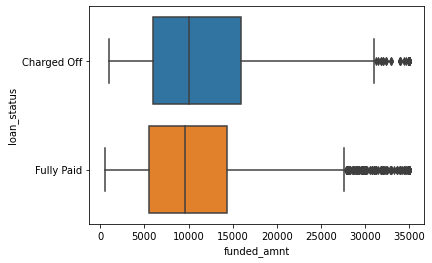

In [265]:
sns.boxplot(x=loan_df['funded_amnt'], y = loan_df['loan_status'], data=loan_df)
plt.show()

### Assumption : Considering Funded Amount for analysis as that is the actual loan amount funded
#### Observation:
    - Overall, the funded ammont distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 16000 (75 percentile value)
    - Charged off loans have higher average of funded amount than the paid off loans.

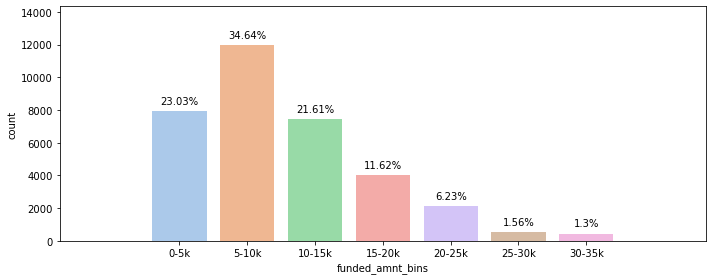

In [268]:
#Funded amount bin
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], 
                                      [x for x in range(0, 40000, 5000)], labels=[str(y)+'-'+str(y+5)+'k' for y in range (0, 35, 5)])

count_plot(loan_df,'funded_amnt_bins')
plt.show()

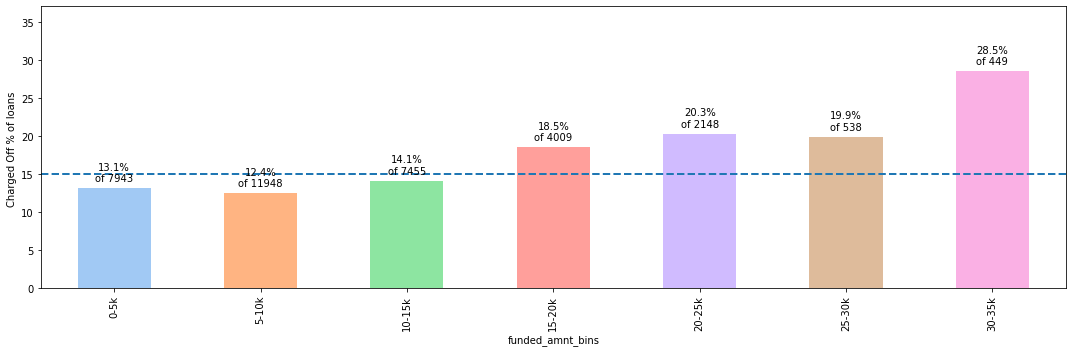

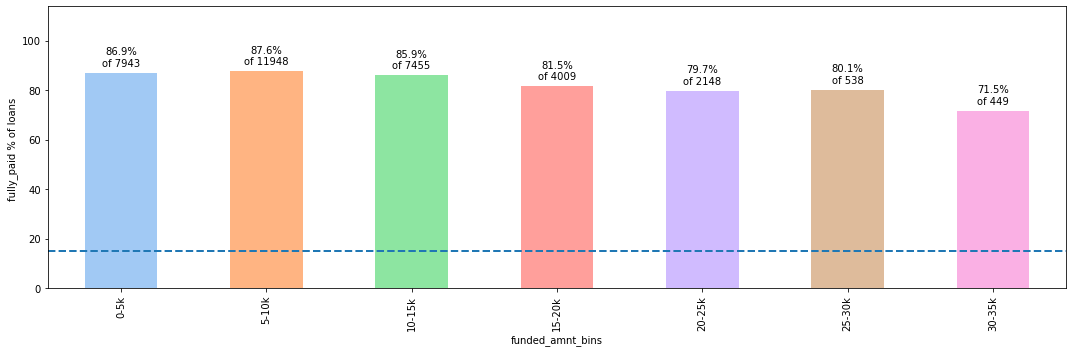

In [51]:
plot_charged_off(loan_df,'funded_amnt_bins')
plot_fully_paid(loan_df,'funded_amnt_bins')


#### Observation
    - The % of charged off loans increases substancially with increase in funded amount. 

#### 4. Grade & Sub-Grade

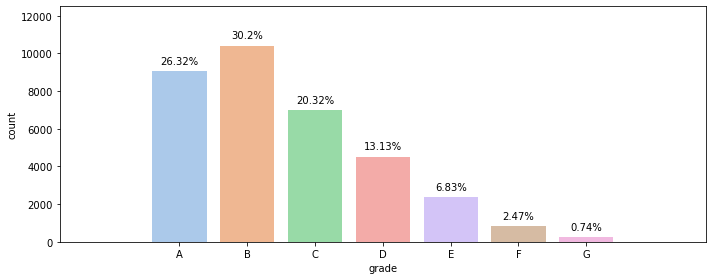

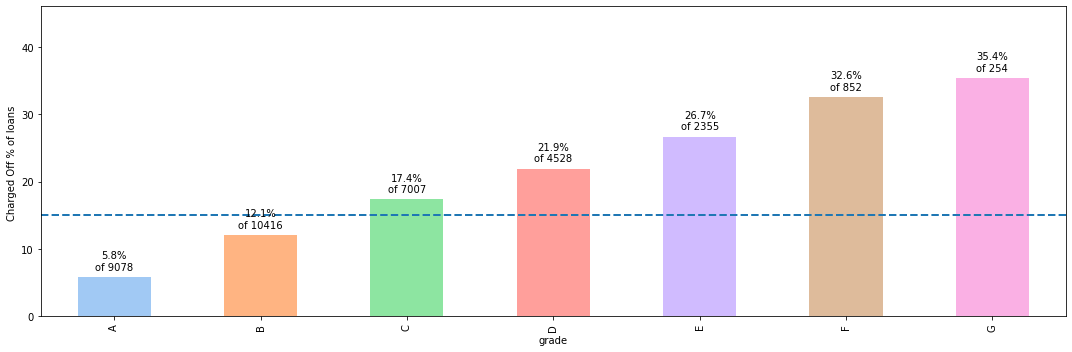

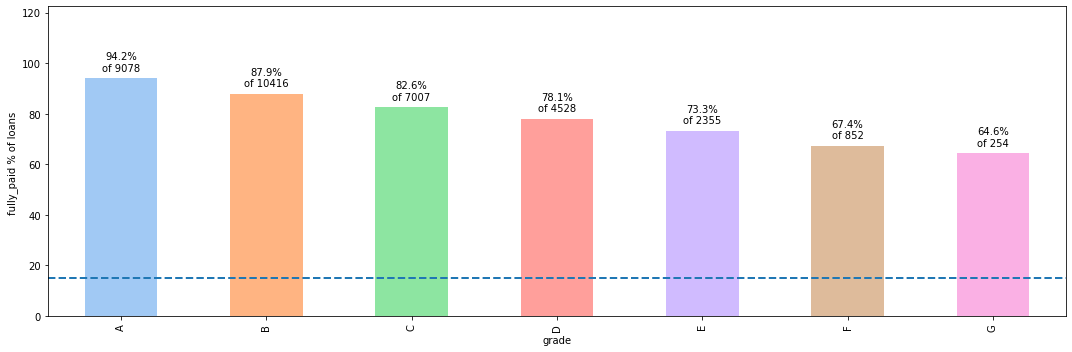

In [53]:
count_plot(loan_df,'grade')
plot_charged_off(loan_df,'grade')
plot_fully_paid(loan_df,'grade')

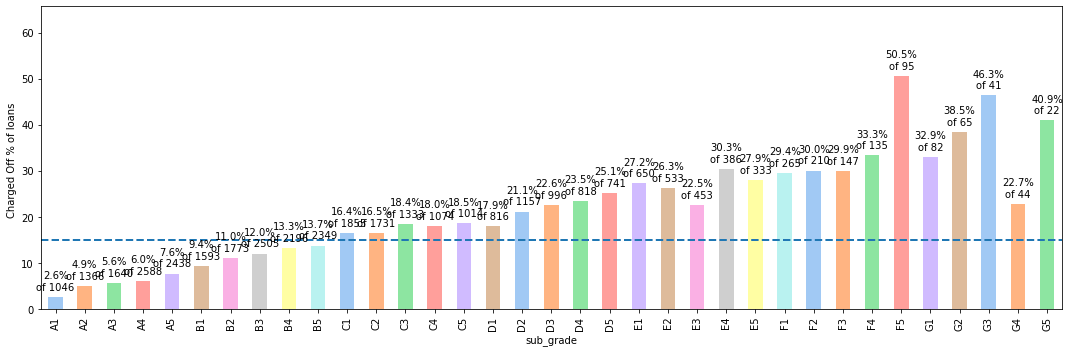

In [54]:
plot_charged_off(loan_df,'sub_grade')


#### Observation: 
    - Chances of defaulting increases with grade from A to G and subgrade from A1-A5, B1-B5, & so forth
    

####  5. Home Ownership

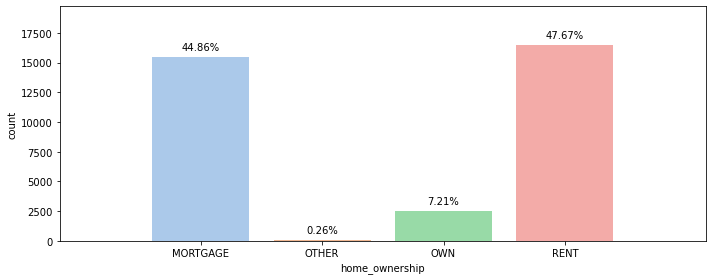

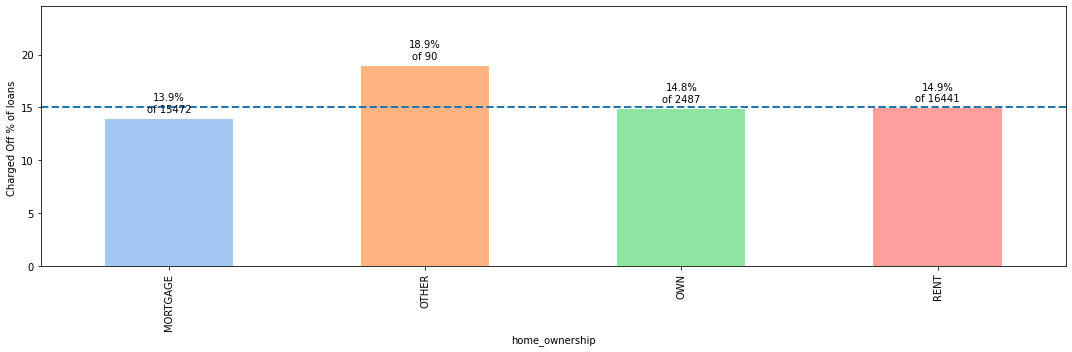

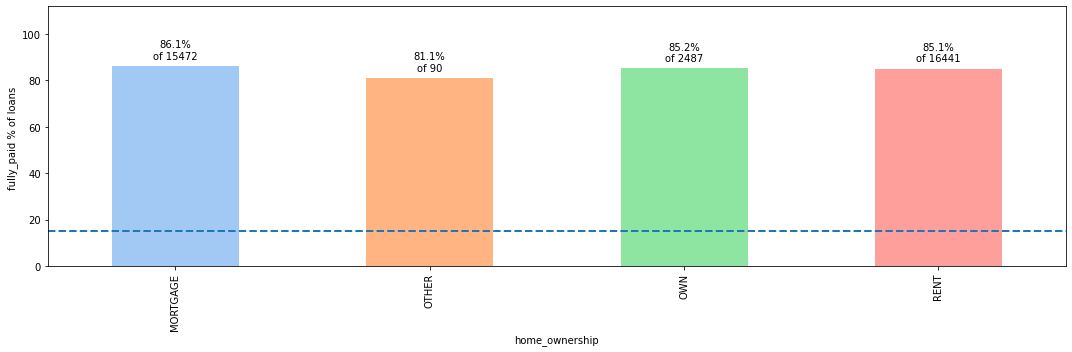

In [55]:
count_plot(loan_df,'home_ownership')
plot_charged_off(loan_df,'home_ownership')
plot_fully_paid(loan_df,'home_ownership')

#### Observation: 
    - People with ownership type as Mortgage and Rent are the most who take loans.
    - The default rate is high for people having home ownership other.
    - The default rate is not significantly impacted by the home ownership status - Mortgage/Owned/Rent
    

####  6. Verification status

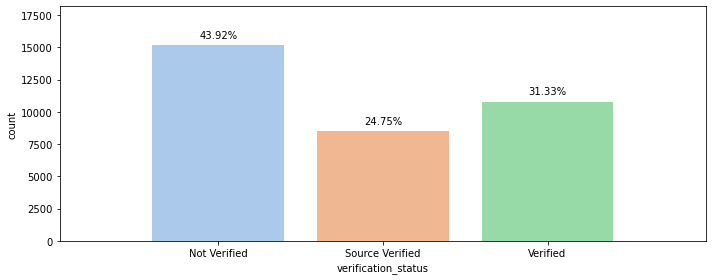

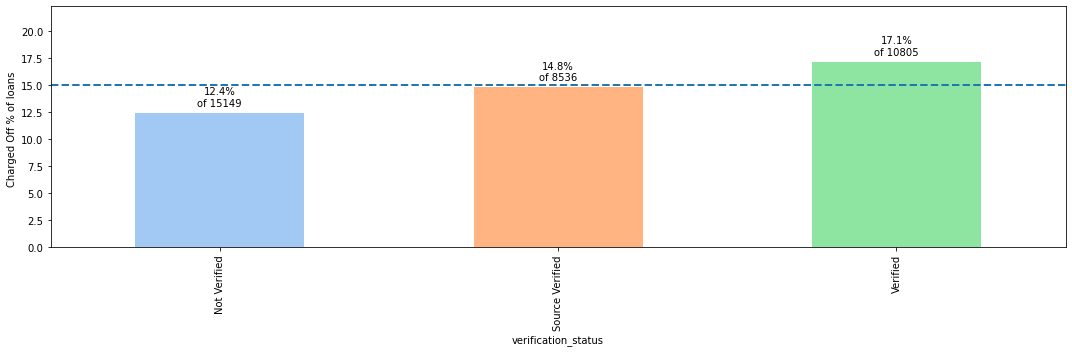

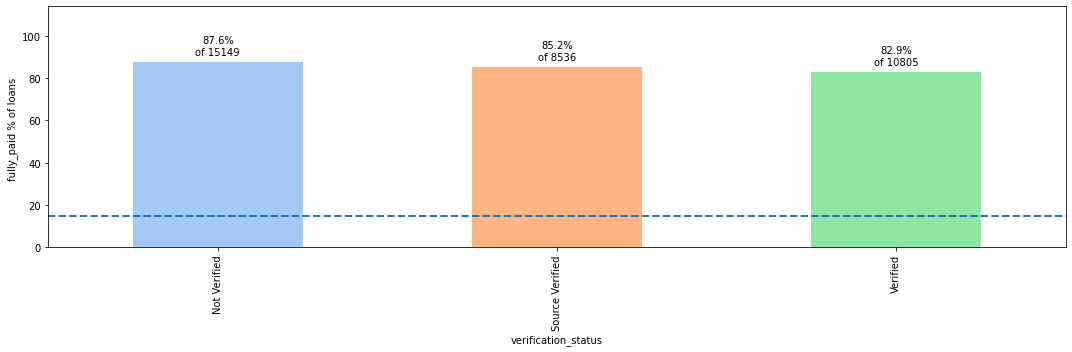

In [56]:
count_plot(loan_df,'verification_status')
plot_charged_off(loan_df,'verification_status')
plot_fully_paid(loan_df,'verification_status')

#### Observation: 
    - Majority of people taking loans are not verified
    - Chances of Defaulting is higher even with the verified verification status.
    

####  7. purpose

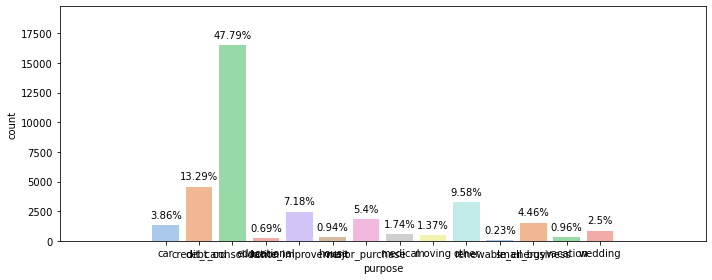

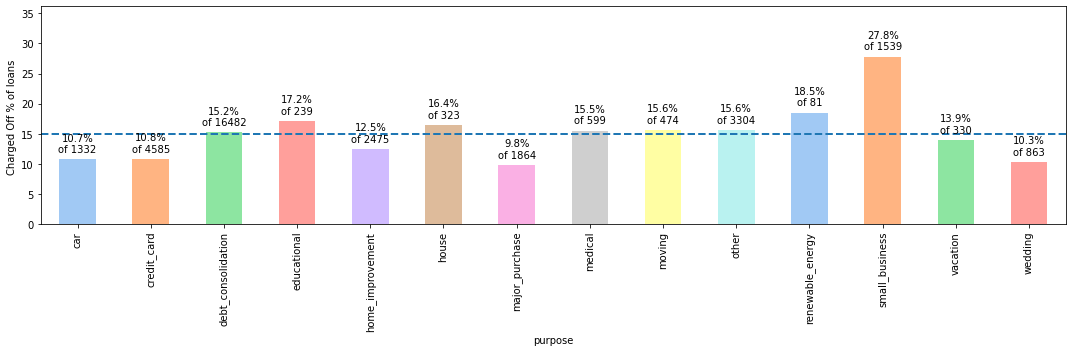

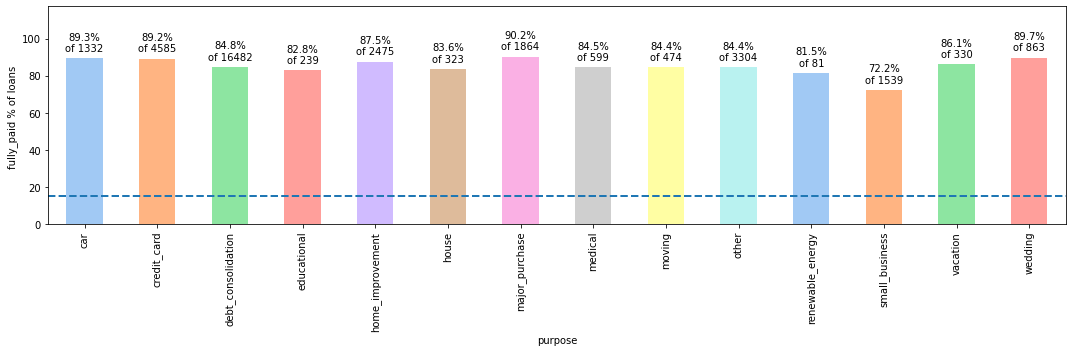

In [57]:
count_plot(loan_df,'purpose')
plot_charged_off(loan_df,'purpose')
plot_fully_paid(loan_df,'purpose')

#### Observation: 
    - Majority of people taking loans have credit card or debt consolidation as purpose.
    - Default rate is higher for small business, renewable energy, educational categories.
    

####  8. Borower State

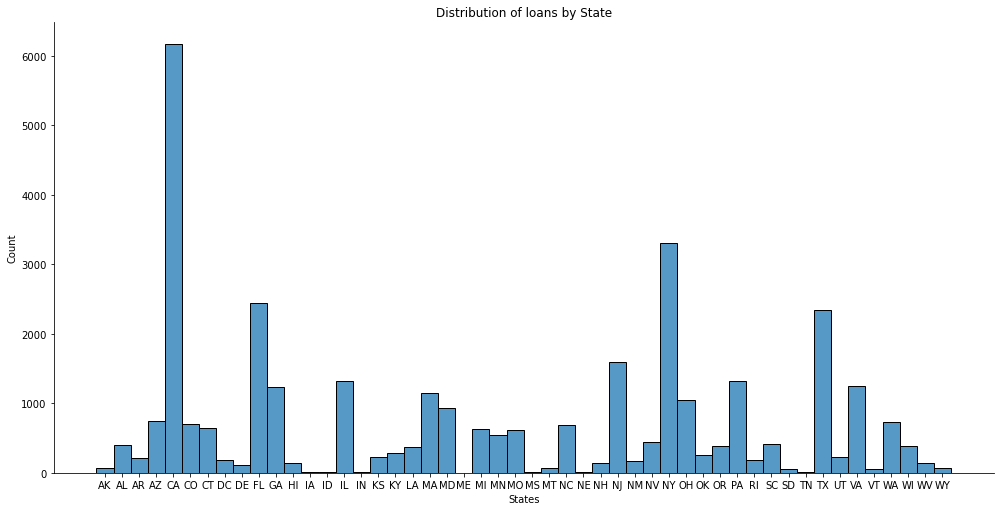

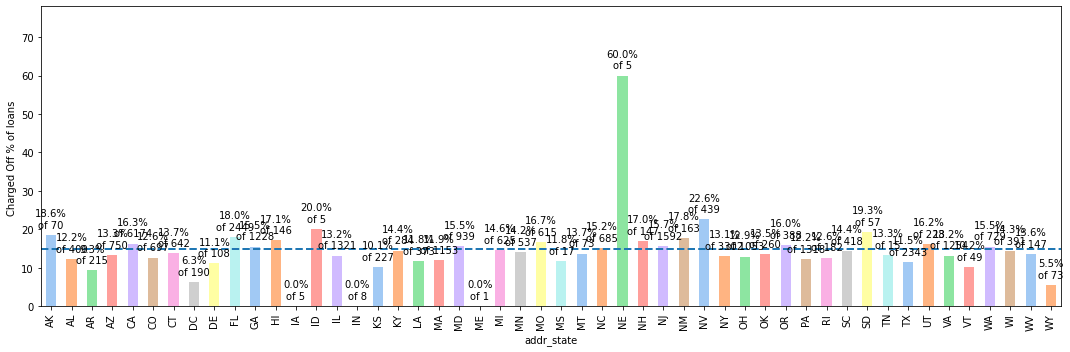

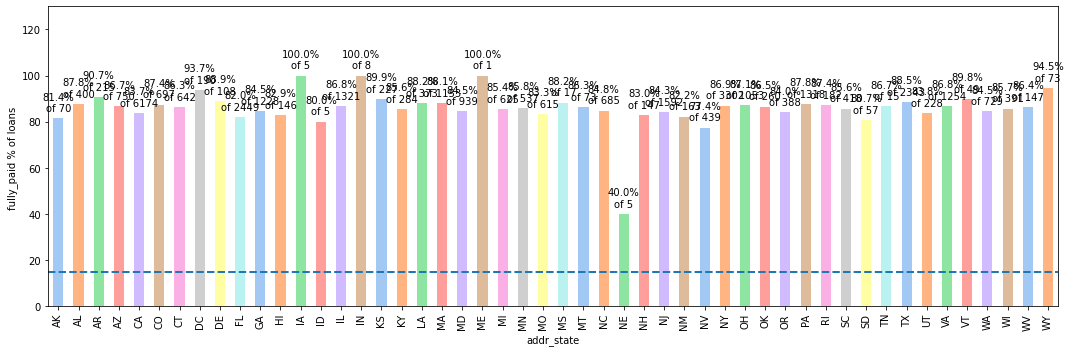

In [58]:
sns.displot(loan_df.addr_state,height=7,aspect=2)
plt.title('Distribution of loans by State')
plt.xlabel('States')
plt.show()

plot_charged_off(loan_df,'addr_state')
plot_fully_paid(loan_df,'addr_state')

#### Observation: 
    - Most of the borrowers are from California, Newyork, Florida
    - Although Nebraska(NE) has high default rate but we can ignore since there are very isignificant number of borrowers. 
    - Nevada and South Dakota have high default rate and with significant % of borrowers. 

#### 9. emp_length

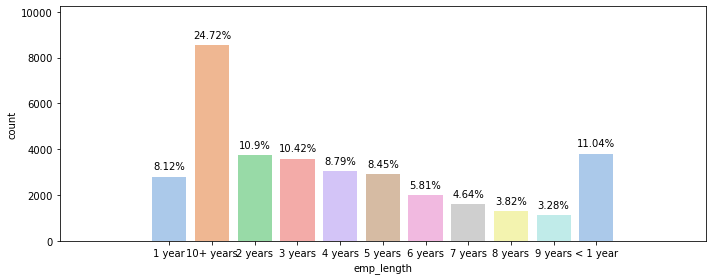

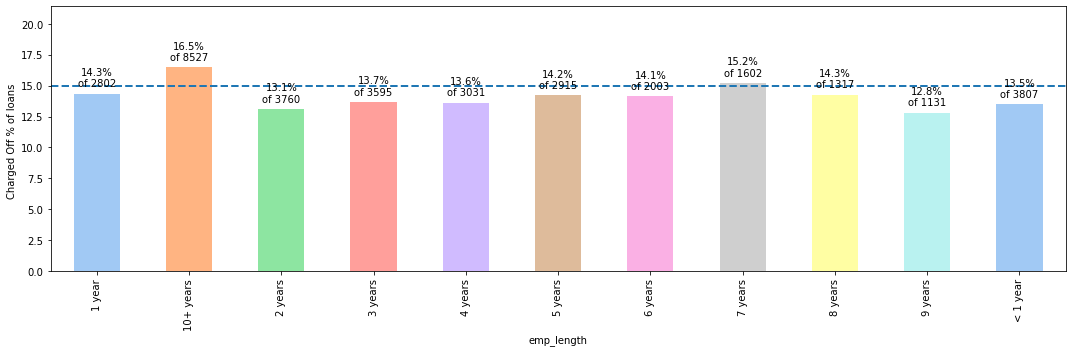

In [59]:
count_plot(loan_df,'emp_length')
plot_charged_off(loan_df,'emp_length')

#### Observation: 
    - Most of the borrowers either have experience >10 or are freshers. 
    - Chances of deafulting is higher for people with experience > 10 years.
    

#### 10. delinq_2yrs; inq_last_6mths; open_acc; pub_rec

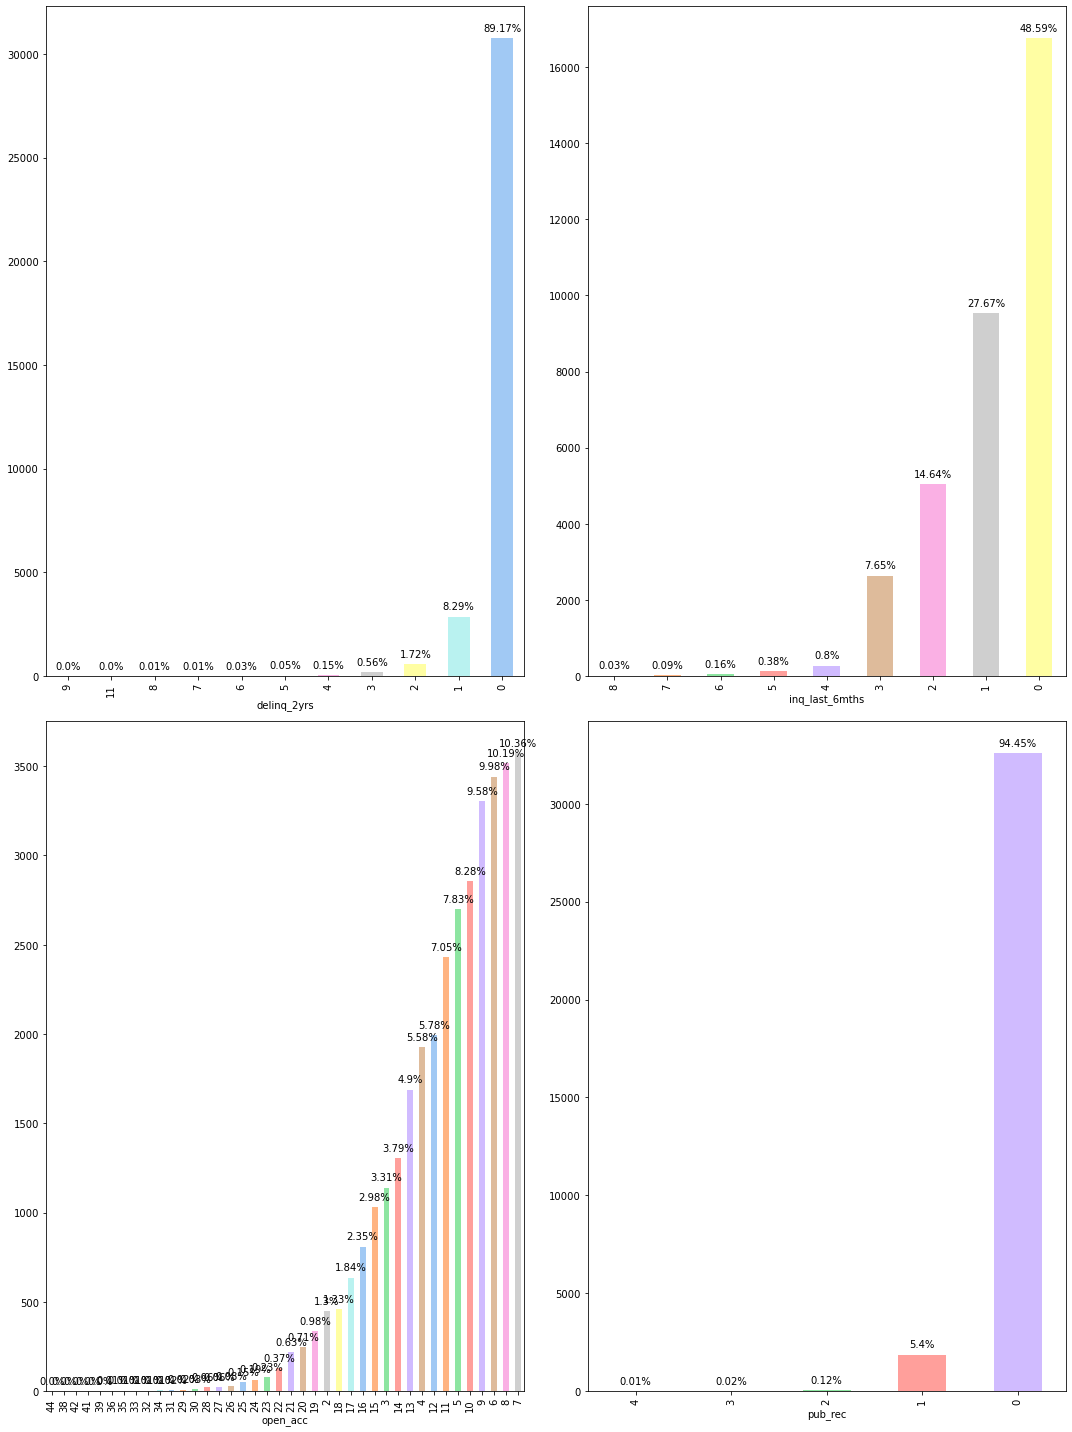

In [60]:
category_columns_list=['delinq_2yrs','inq_last_6mths','open_acc','pub_rec']
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, category_columns_list)

#### 11. Installment

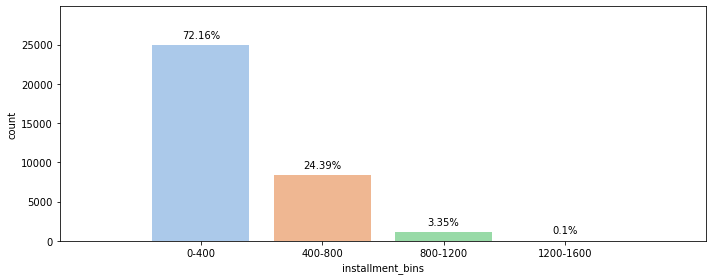

In [85]:
#installment bins
loan_df['installment_bins'] = pd.cut(loan_df['installment'], 
                                      [x for x in range(0, 2000, 400)], labels=[str(y)+'-'+str(y+400) for y in range (0,1500,400)])

count_plot(loan_df,'installment_bins')
plt.show()


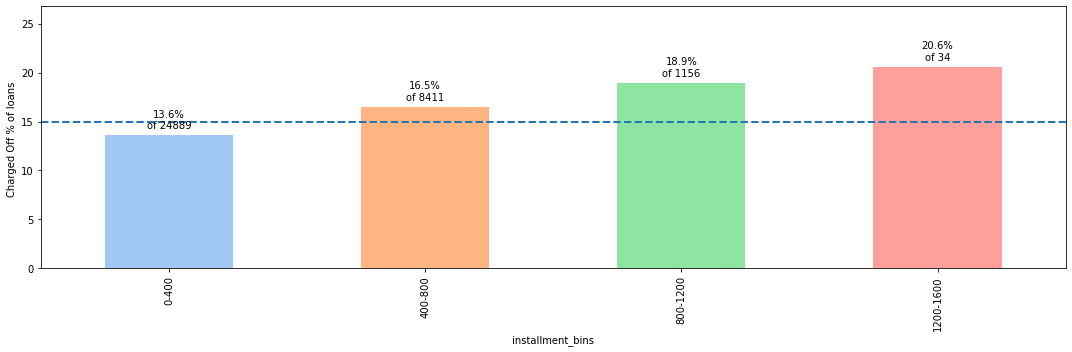

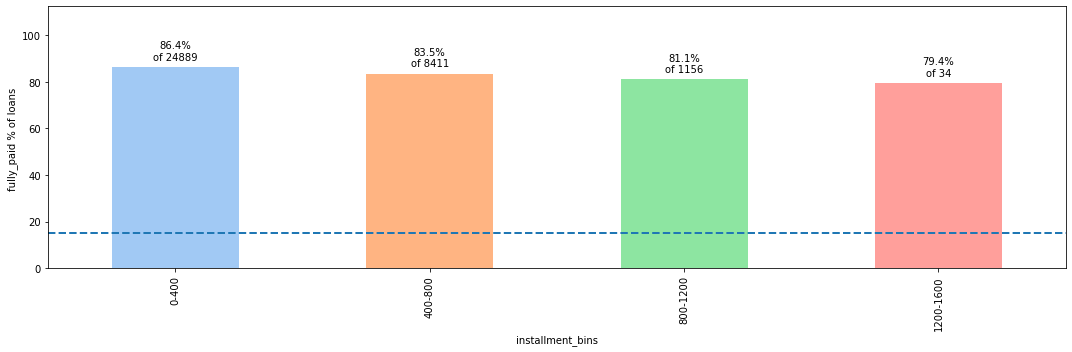

In [86]:
plot_charged_off(loan_df,'installment_bins')
plot_fully_paid(loan_df,'installment_bins')

Observation:
- Chances of deafulting are higher for loans with higher amount of installment

#### 12. annual_inc

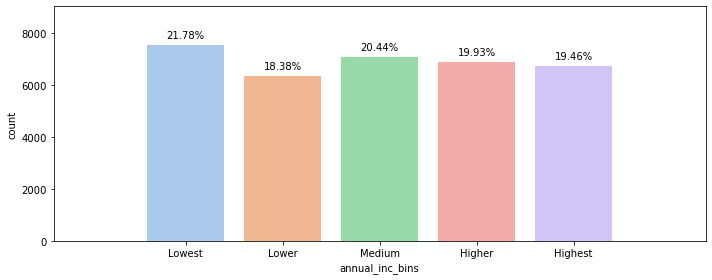

In [88]:
# annual_inc bins
loan_df['annual_inc_bins']=pd.qcut(loan_df['annual_inc'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
count_plot(loan_df,'annual_inc_bins')
plt.show()

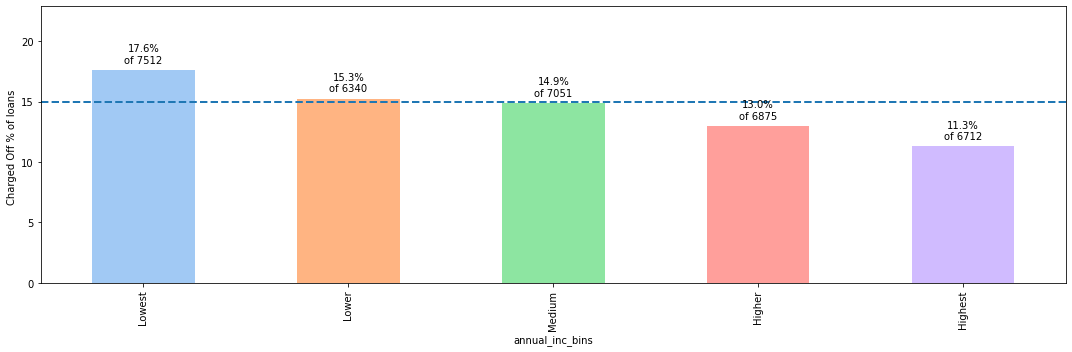

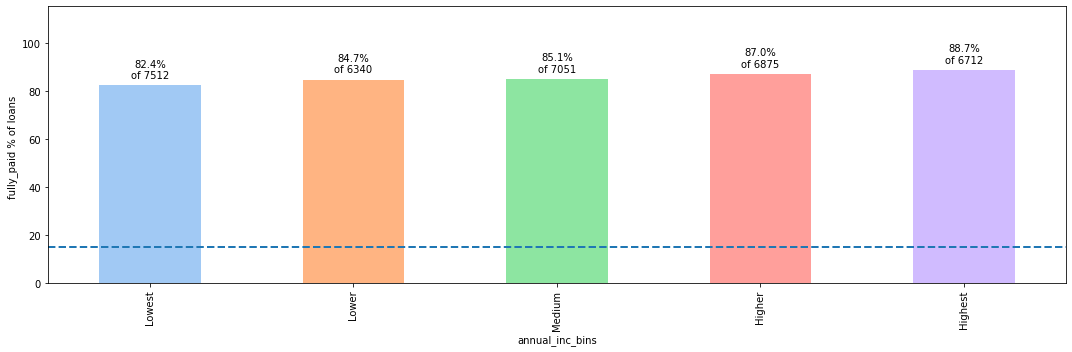

In [89]:
plot_charged_off(loan_df,'annual_inc_bins')
plot_fully_paid(loan_df,'annual_inc_bins')

In [ ]:
Observation:
- People with low annual income have high chances of deafulting.

#### 13. dti

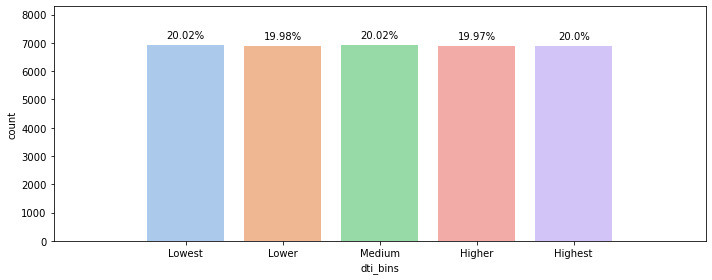

In [92]:
# dti bins
loan_df['dti_bins']=pd.qcut(loan_df['dti'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
count_plot(loan_df,'dti_bins')
plt.show()

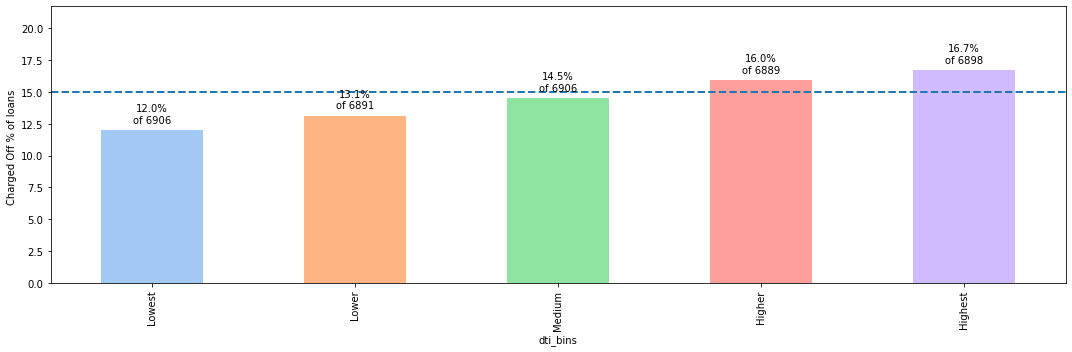

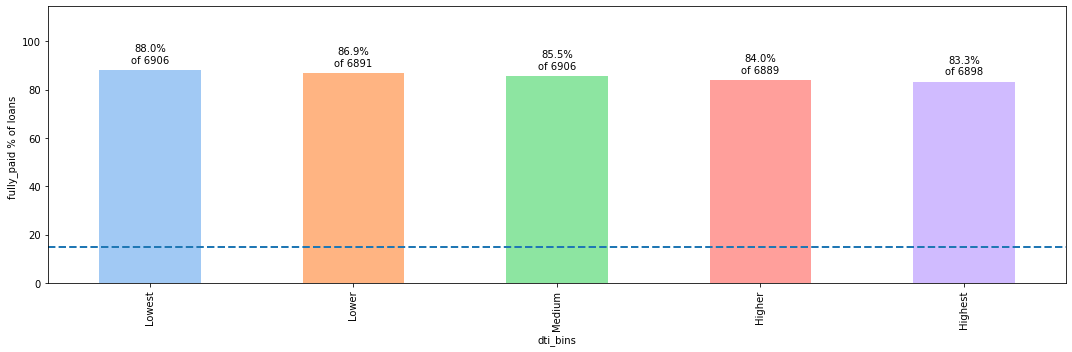

In [277]:
plot_charged_off(loan_df,'dti_bins')
plot_fully_paid(loan_df,'dti_bins')

Observation:
- High  DTI ( debt to income ratio) results in higher charged off %.

#### 14. revol_bal

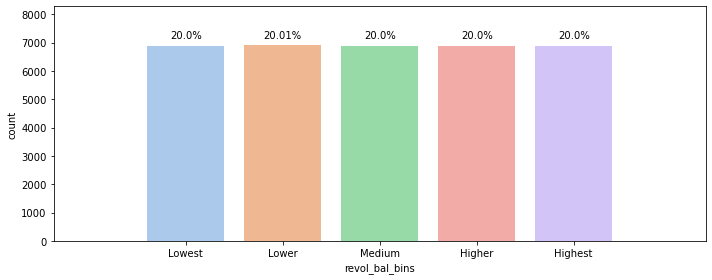

In [95]:
# revol_bal bins
loan_df['revol_bal_bins']=pd.qcut(loan_df['revol_bal'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
count_plot(loan_df,'revol_bal_bins')
plt.show()

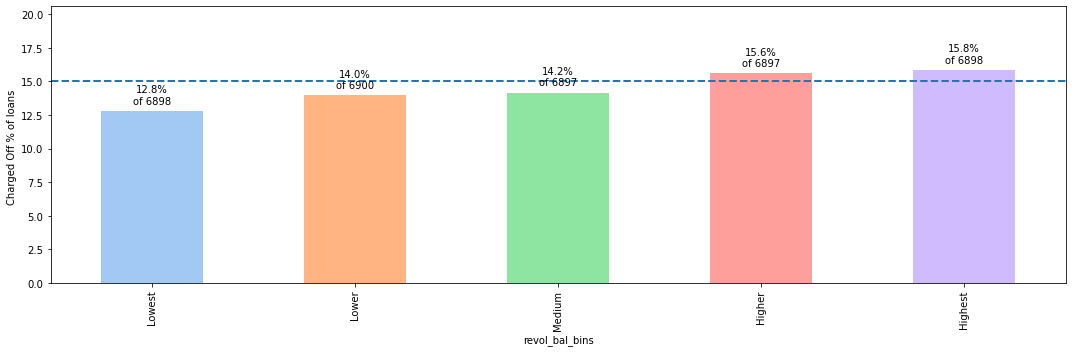

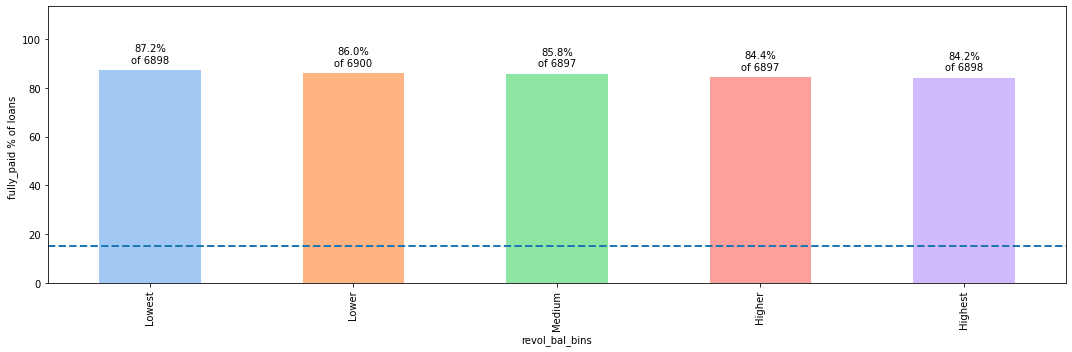

In [96]:
plot_charged_off(loan_df,'revol_bal_bins')
plot_fully_paid(loan_df,'revol_bal_bins')

Observation:
- Higher the revolving balance, bigger the chance of the loan getting defaulted.

#### 15. int_rate_percentage

In [98]:
loan_df['int_rate_percentage'].describe()

count    34490.000000
mean        11.901601
std          3.685373
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate_percentage, dtype: float64

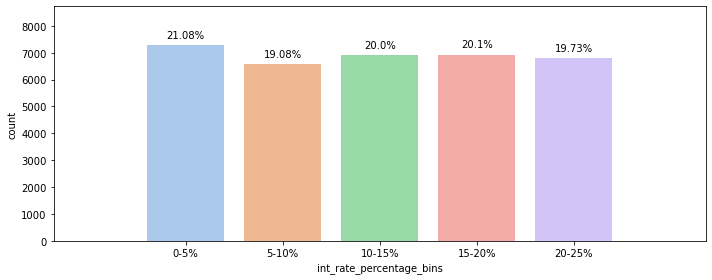

In [104]:
# revol_bal bins
loan_df['int_rate_percentage_bins']=pd.qcut(loan_df['int_rate_percentage'], q=5, labels=[str(y)+'-'+str(y+5)+'%' for y in range (0, 25, 5)])
count_plot(loan_df,'int_rate_percentage_bins')
plt.show()

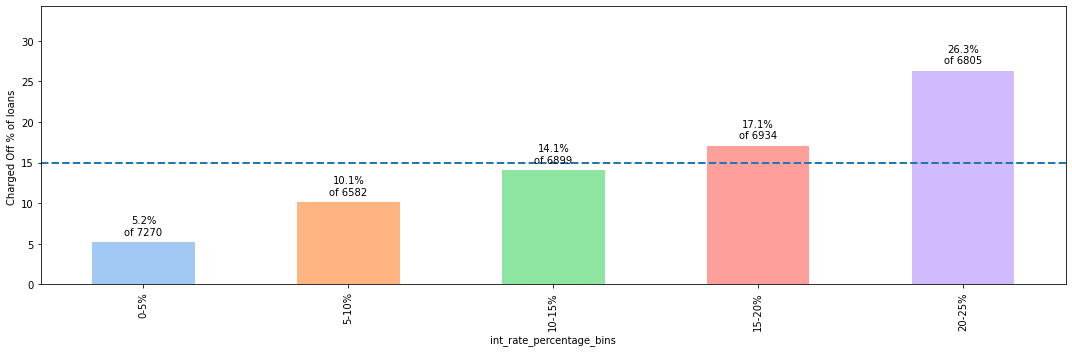

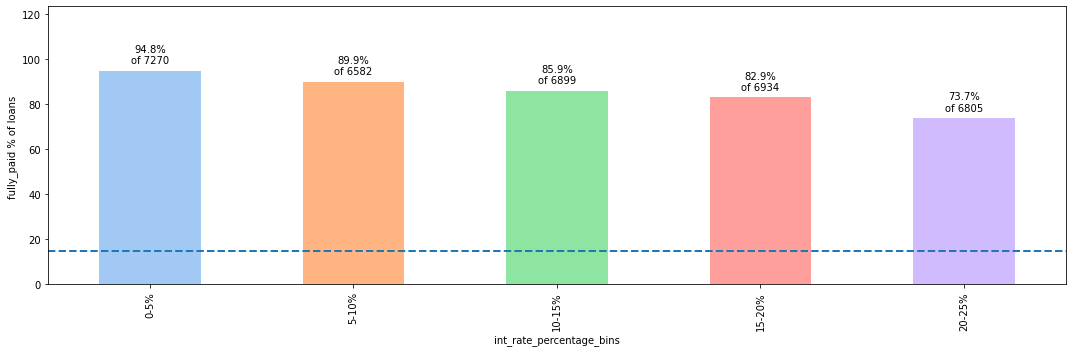

In [105]:
plot_charged_off(loan_df,'int_rate_percentage_bins')
plot_fully_paid(loan_df,'int_rate_percentage_bins')

Observation:

Loans with high interset rates results into high default rates.

#### 16. issue_d_month

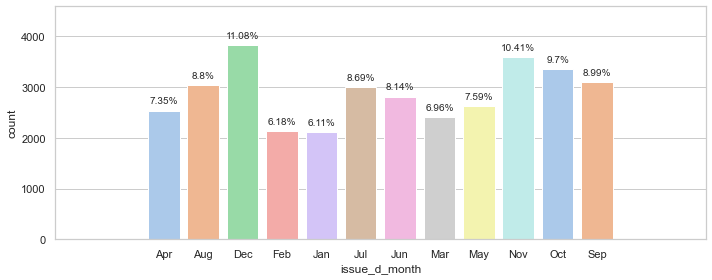

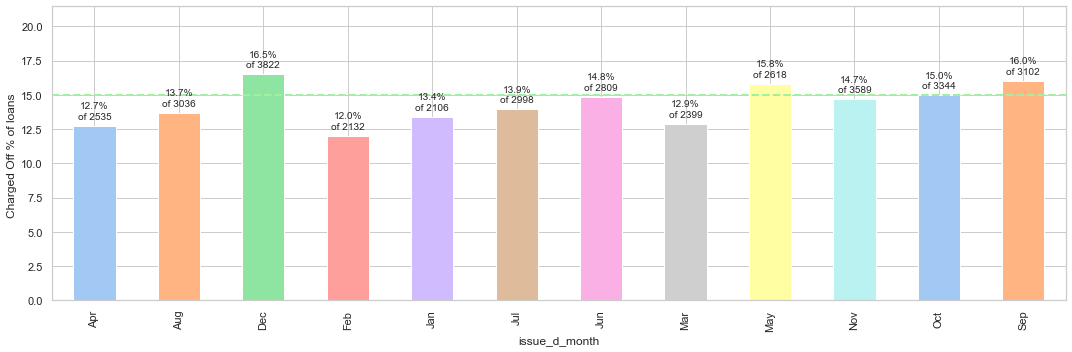

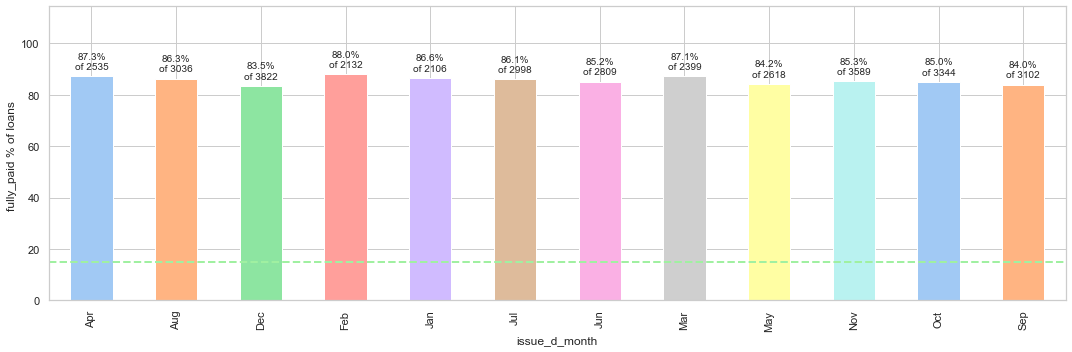

In [430]:
count_plot(loan_df,'issue_d_month')
plot_charged_off(loan_df,'issue_d_month')
plot_fully_paid(loan_df,'issue_d_month')

Observation:

-  December has the highest charged off ratio.

#### 17. pub_rec_bankruptcies

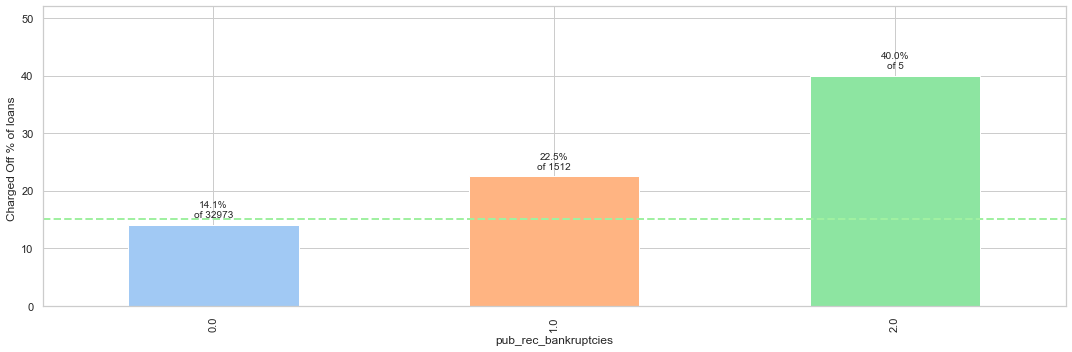

In [428]:
plot_charged_off(loan_df,'pub_rec_bankruptcies')


#### Observation:
    - Chances of defaulting is high when the borrower has record of public record bankruptcies.
    

#### 18. delinq_2yrs

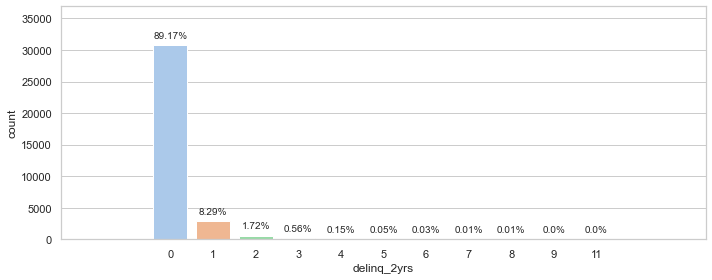

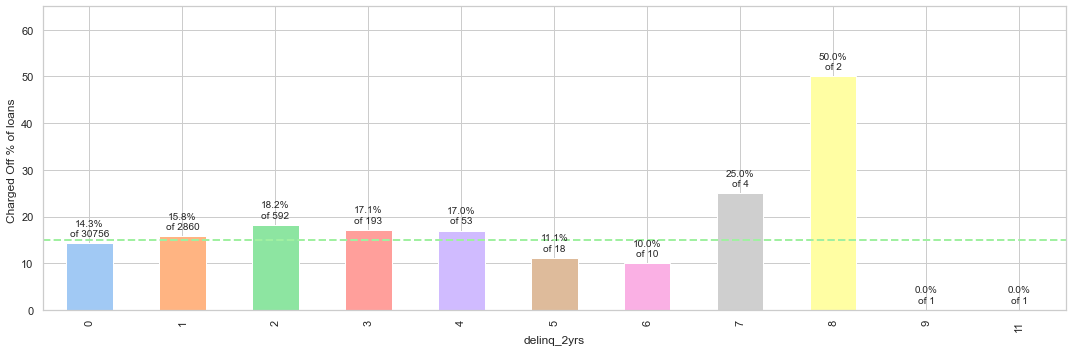

In [426]:
loan_df.delinq_2yrs.value_counts()
count_plot(loan_df,'delinq_2yrs')
plot_charged_off(loan_df,'delinq_2yrs')


#### Observation:
    - No significant observation
    

#### 19. term_months

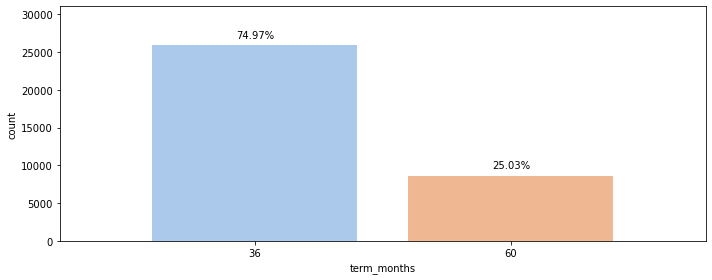

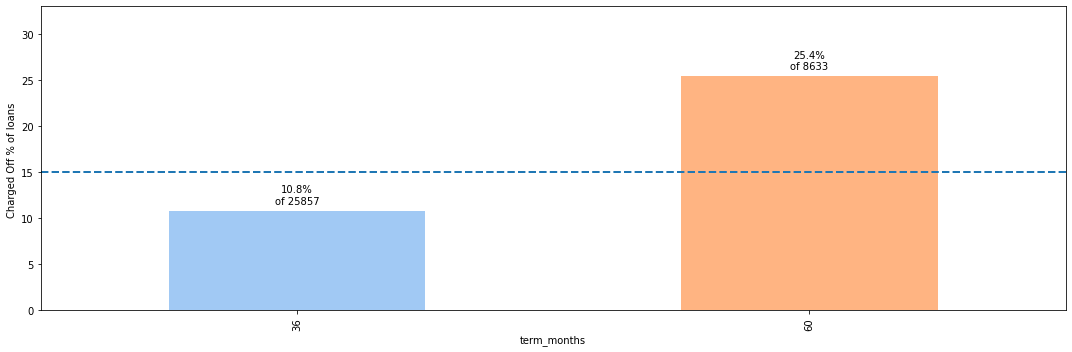

In [287]:
loan_df.term_months.value_counts()
count_plot(loan_df,'term_months')
plot_charged_off(loan_df,'term_months')

Observation:
- The charged off % is significantly high for loans of longer tenure(5 years)

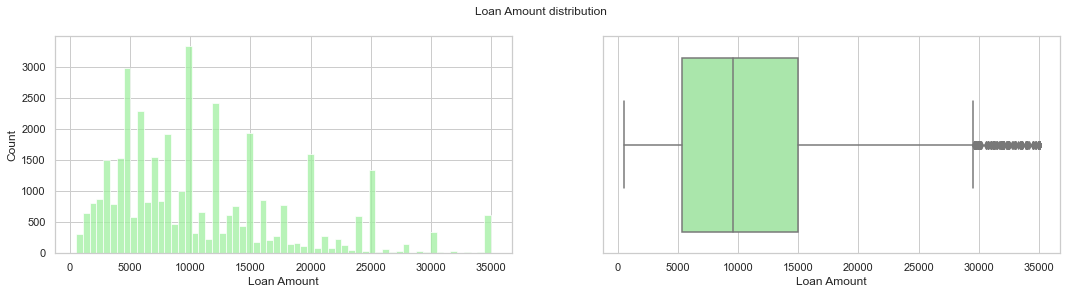

In [278]:
## univariate analysis for loan_amnt
plt.figure(figsize=(18,4))
plt.suptitle('Loan Amount distribution')
plt.subplot(1,2,1)
##plotting the histplot to check the distribution of the loan_amnt
sns.histplot(data=loan_df, x="loan_amnt")
plt.xlabel('Loan Amount')
plt.subplot(1,2,2)
##plotting the boxplot to check the IQR 
sns.boxplot(x=loan_df.loan_amnt)
plt.xlabel('Loan Amount')
plt.show()


In [280]:
loan_df.loan_amnt.median()

9600.0

### Observation :
 - median of the loan ammount is ~10k or $9600
 - Q1/Q2 range is between 5k to 15k

Categorical columns that will help in analysis

<div class="alert alert-block alert-info">
<h2>Bivariate Analysis</bh2>

In this analysis we will consider the combined effect of two variables on the loan-status.

### Bivariate Analysis on categorical variables

#### Reusable Functions

In [260]:
def Bivariate_Analysis (*, data=loan_df, x, y, title=None,fig=(10,8)):
    fig, ax = plt.subplots(figsize=fig)
    pt = pd.pivot_table(data=data, values='loan_status_numerical', index=y, columns=x,aggfunc=sum)
    sns.heatmap(pt, ax=ax, cmap='PuBuGn')
    if title is not None:
        plt.title(title)
    plt.show()

To analyze combined effects of variables ,we will create heat maps.

In [269]:
## Convert loan_status column to numerical value so that aggregation may appy over it 
# assign 1 for charged off loans and 0 for fully paid off
loan_df['loan_status_numerical'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_df['loan_status_numerical']=loan_df['loan_status_numerical'].astype('int')


#### 1. Annual Income and Installment<br>


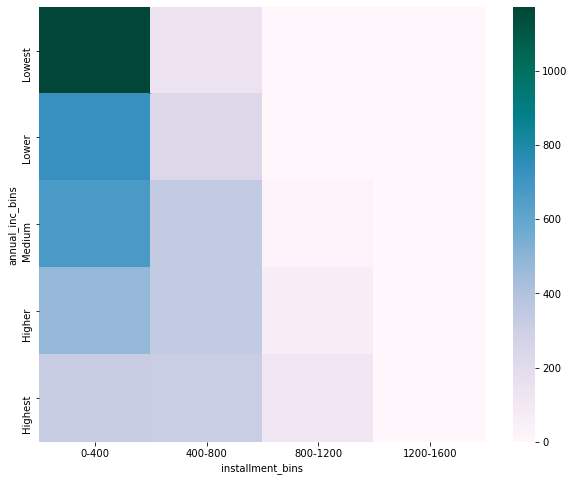

In [261]:
## Bivariate Analysis of annual income and installment with loan status
Bivariate_Analysis(y='annual_inc_bins', x='installment_bins')

Observation:
- Chances of defaulting is high when the borrower has annual income in the lowest segment, even though the installment is lowest too.

#### 2. home_ownership and purpose

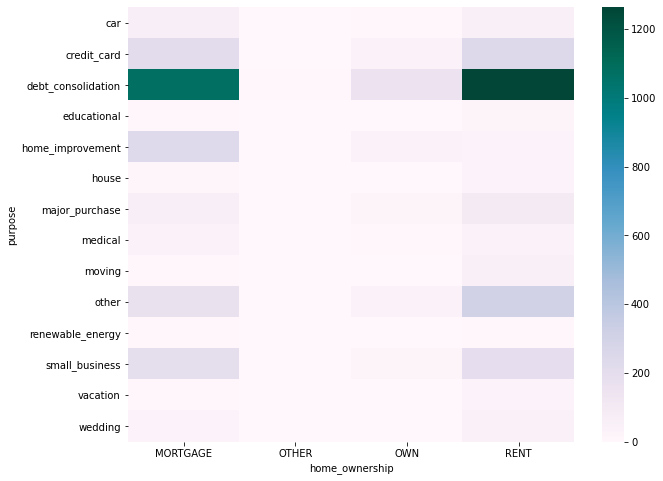

In [262]:
## Bivariate Analysis of home_ownership and purpose with loan status
Bivariate_Analysis(x='home_ownership', y='purpose')

Observation:
- Chances of defaulting is high when the borrower living in mortgage or rented home takes loan for the purpose of debt consolidation.

#### 3. addr_state and purpose

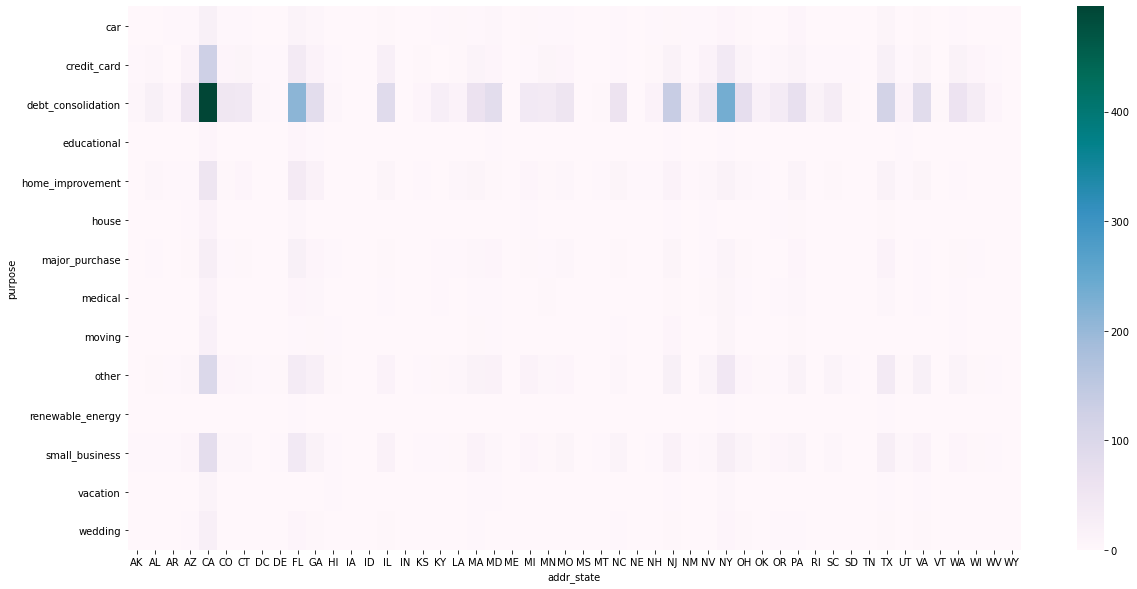

In [263]:
Bivariate_Analysis(x='addr_state', y='purpose',fig=(20,10))

Observation:
- The darker areas depict the purposes associated with an area which lead to high charged off loans.

#### 4. dti and annual income

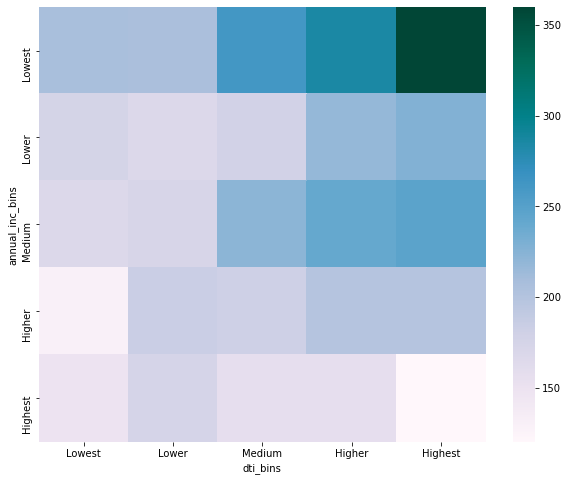

In [264]:
Bivariate_Analysis(x='dti_bins', y='annual_inc_bins')

Observation:
- Chances of defaulting is high for the borrower with lowest income and high dti(debt to income ratio).

#### 5. int_rate_percentage and annual income

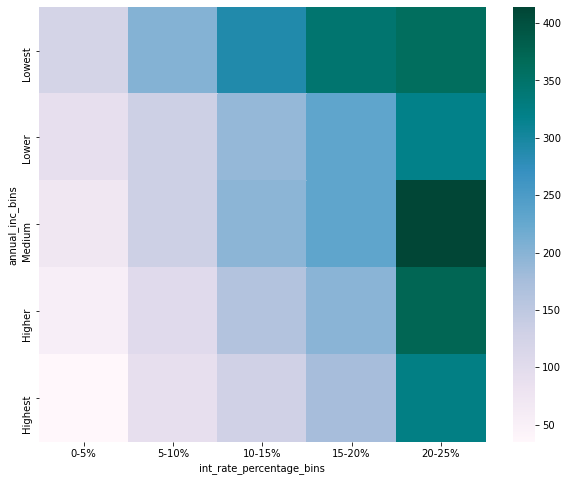

In [274]:
Bivariate_Analysis(x='int_rate_percentage_bins', y='annual_inc_bins')

Observation:
- High interest rate for lower and medium income groups lead to high default rate

### Bivariate Analysis on Continuous Variables

In [282]:
loan_df.dtypes

loan_amnt                    float64
funded_amnt                  float64
funded_amnt_inv              float64
installment                  float64
grade                       category
sub_grade                   category
emp_length                  category
home_ownership              category
annual_inc                   float64
verification_status         category
loan_status                 category
purpose                     category
addr_state                  category
dti                          float64
delinq_2yrs                 category
earliest_cr_line              object
inq_last_6mths              category
open_acc                    category
pub_rec                     category
revol_bal                    float64
total_acc                      int64
total_pymnt                  float64
total_pymnt_inv              float64
pub_rec_bankruptcies        category
term_months                    int64
int_rate_percentage          float64
loan_income_ratio            float64
i

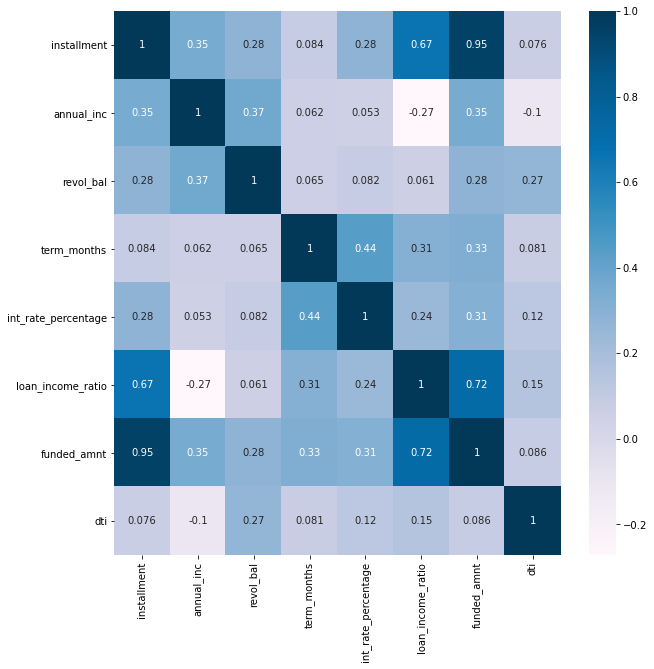

In [286]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(loan_df[['installment','annual_inc','revol_bal','term_months','int_rate_percentage','loan_income_ratio','funded_amnt','dti']].corr(),ax=ax, annot=True,cmap='PuBu')
plt.show()

Observation:
- This correlation matrix depicts : <br>
   <font color=blue>  
    1. Funded amount have very high correlation with the loan income ratio.<br>
    2. Term months and interest rate are positively correlated</font>

<div class="alert alert-block alert-info">
<h2> Conclusion</h2>

Here we have tried to find some of the drivers leading to loan default and consequent charging off of the loans.
On the basis of the analysis made above, the most impactful drivers are :

Lending club should bring more gurad rails for loans given with following factors <br>
<font color=green>

   - when loans are given for the purpose --> small business, renewable energy, education.
   - for higher grade category loans especially E,F and G.
   - for loans of longer tenure(5 years).
   - when loan amount is higher.
   - when the installment amount is high.
   - when the customer has lower income and high debt to income ratio
   - when  interest rate charged is higher
   - when the borrower living in mortgage or rented home takes loan for the purpose of debt consolidation.
 </font>
    
There is an oppurtunity to expand the business in states other than California, Newyork, Florida. Though more caution has to be paid while lending loans to Nevada and South Dakota  as they have high default rate with significant % of borrowers.  

Analysing the data , it can be observed that the loan disbursment increases  towards the end of the year. So, it is an oppurtunity for the Lending Club to increase its business in the early part of the year.